In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print("Data science project")


Data science project


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cd '/content/drive/MyDrive/data_science_rekru'
!pwd

/content


In [4]:
df=pd.read_csv('/content/drive/MyDrive/data_science_rekru/dane.csv') # create the dataframe

B/0/P


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
# get categorical data

print("Categorical data: ")
nnumbs=df.select_dtypes(include=['object']).columns
[print("-", nnumb) for nnumb in nnumbs]

Categorical data: 
- PassengerId
- HomePlanet
- CryoSleep
- Cabin
- Destination
- VIP
- Name


[None, None, None, None, None, None, None]

In [7]:
# get numerical data

print("Numerical data: ")
numbs=df._get_numeric_data().columns
[print("-", numb) for numb in numbs]



Numerical data: 
- Age
- RoomService
- FoodCourt
- ShoppingMall
- Spa
- VRDeck
- Transported


[None, None, None, None, None, None, None]

In [6]:
# how many null values

for col in df.columns:
  print(col, df[col].isnull().sum())

df.isnull().sum()/len(df)*100

PassengerId 0
HomePlanet 201
CryoSleep 217
Cabin 199
Destination 182
Age 179
VIP 203
RoomService 181
FoodCourt 183
ShoppingMall 208
Spa 183
VRDeck 188
Name 200
Transported 0


PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

In [ ]:
# to check how many rows are left if all rows with at least one empty cell are deleted

df_2=df.copy()
df_2.info()
for col in df_2.columns:
  print(df_2.dropna(subset=[col], inplace=True))

df_2.info()

df.info()



In [23]:
# people with same names and age - needs improvement

dups=df.duplicated(subset=['Age', 'Name'], keep=False)
# dups_2=df.duplicated(subset=['Age', 'Name'], keep=True)

for i, dup in enumerate(dups):
  if dup==True and len(str(df['Name'][i]))>3:
    print(df['PassengerId'][i], df['Name'][i], df['Age'][i])



for i, dup in enumerate(dups):
  if (dup==True and dup==ages[i]) and (len(str(df['Name'][i]))>3):
    print(df['PassengerId'][i], " ", df['Name'][i], df['Age'][i])


3849_01 Timmy Santry 27.0
4416_01 Alramak Prearright 47.0
6137_05 Loree Serry 2.0
6320_01 Guink Ste 53.0
3849_01   Timmy Santry 27.0
4416_01   Alramak Prearright 47.0
6137_05   Loree Serry 2.0
6320_01   Guink Ste 53.0


In [8]:
# data cleaning for categorical data:

print("Categorical data: ")
nnumbs=df.select_dtypes(include='object').columns
print(nnumbs)
for nnumb in nnumbs:
  if(nnumb!='Name' and nnumb!='Cabin' and nnumb!='CryoSleep' and nnumb!='VIP'):
    df[nnumb].fillna(df[nnumb].mode()[0], inplace=True)
  if(nnumb=='Name' or nnumb=='Cabin'):
    df[nnumb].fillna('unknown',inplace=True)

df.isnull().sum()

Categorical data: 
Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object')


PassengerId       0
HomePlanet        0
CryoSleep       217
Cabin             0
Destination       0
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name              0
Transported       0
dtype: int64

In [ ]:
# calculate mean spendings for all, VIP and non-VIP

vip_spa_mean=df.loc[df['VIP'] == True, 'Spa'].mean()
nvip_spa_mean=df.loc[df['VIP'] == False, 'Spa'].mean()

vip_food_mean=df.loc[df['VIP'] == True, 'FoodCourt'].mean()
nvip_food_mean=df.loc[df['VIP'] == False, 'FoodCourt'].mean()

vip_room_mean=df.loc[df['VIP'] == True, 'RoomService'].mean()
nvip_room_mean=df.loc[df['VIP'] == False, 'RoomService'].mean()

vip_shop_mean=df.loc[df['VIP'] == True, 'ShoppingMall'].mean()
nvip_shop_mean=df.loc[df['VIP'] == False, 'ShoppingMall'].mean()

vip_deck_mean=df.loc[df['VIP'] == True, 'VRDeck'].mean()
nvip_deck_mean=df.loc[df['VIP'] == False, 'VRDeck'].mean()

print('VIP SPA MEAN: ', vip_spa_mean)
print('NON-VIP SPA MEAN: ', nvip_spa_mean, '\n')

print('VIP FoodCourt MEAN: ', vip_food_mean)
print('NON-VIP FoodCourt MEAN: ', nvip_food_mean, '\n')

print('VIP RoomService MEAN: ', vip_room_mean)
print('NON-VIP RoomService MEAN: ', nvip_room_mean, '\n')

print('VIP ShoppingMall MEAN: ', vip_shop_mean)
print('NON-VIP ShoppingMall MEAN: ', nvip_shop_mean, '\n')

print('VIP VRDeck MEAN: ', vip_deck_mean)
print('NON-VIP VRDeck MEAN: ', nvip_deck_mean, '\n')


vip_expenses_mean=(vip_spa_mean + vip_room_mean + vip_food_mean + vip_deck_mean + vip_shop_mean)/5
nvip_expenses_mean=(nvip_spa_mean + nvip_room_mean + nvip_food_mean + nvip_deck_mean + nvip_shop_mean)/5
mixed_mean=(vip_expenses_mean+nvip_expenses_mean)/2

print('mean vip expenses: ', vip_expenses_mean)
print('mean non-vip expenses: ', nvip_expenses_mean)
print('mean non-vip expenses: ', mixed_mean, '\n')



# fill missing values for VIP basing on their spendings in all areas
df.loc[(df.FoodCourt+df.Spa+df.ShoppingMall+df.VRDeck+df.RoomService)>=mixed_mean , 'VIP'] = True
df.loc[df.FoodCourt<mixed_mean , 'VIP'] = False

# additional condition for VIPs missing
df.loc[df.Spa>400 , 'VIP'] = True
df.loc[df.Spa<400 , 'VIP'] = False


# fill missing values for spendings on the ship
# if CryoSleep=True, missing expenses = 0, else mode from the column

df.loc[df.CryoSleep==True , 'FoodCourt'] = 0
df.loc[df.CryoSleep==False , 'FoodCourt'] = df['FoodCourt'].mode()
df.loc[df.CryoSleep==True , 'RoomService'] = 0
df.loc[df.CryoSleep==False , 'RoomService'] = df['RoomService'].mode()
df.loc[df.CryoSleep==True , 'ShoppingMall'] = 0
df.loc[df.CryoSleep==False , 'ShoppingMall'] = df['ShoppingMall'].mode()
df.loc[df.CryoSleep==True , 'Spa'] = 0
df.loc[df.CryoSleep==False , 'Spa'] = df['Spa'].mode()
df.loc[df.CryoSleep==True , 'VRDeck'] = 0
df.loc[df.CryoSleep==False , 'VRDeck'] = df['VRDeck'].mode()



# fill missing values for CryoSleep
# if Spa=0 (could be a sum of expenses as well) then that person is in the coma

df.loc[df.Spa==0 , 'CryoSleep'] = True
df.loc[df.Spa>0 , 'CryoSleep'] = False



# # if there are any remaining empty values fill them with the mode value from the column

df['FoodCourt'].fillna(df['FoodCourt'].mode()[0], inplace=True)
df['RoomService'].fillna(df['RoomService'].mode()[0], inplace=True)
df['Age'].fillna(df['Age'].mode()[0], inplace=True)
df['ShoppingMall'].fillna(df['ShoppingMall'].mode()[0], inplace=True)
df['Spa'].fillna(df['Spa'].mode()[0], inplace=True)
df['VRDeck'].fillna(df['VRDeck'].mode()[0], inplace=True)


df.info()



<function matplotlib.pyplot.show(close=None, block=None)>

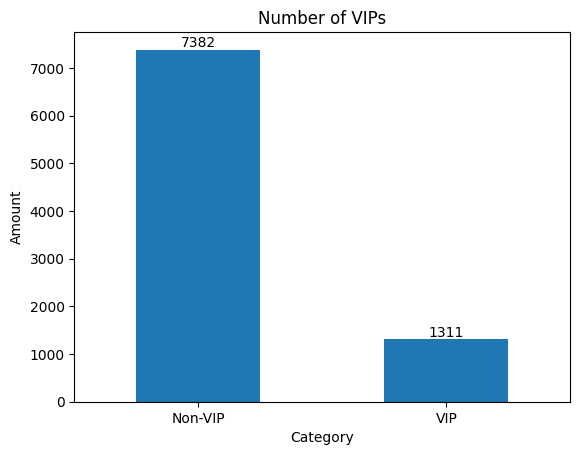

In [15]:
# number of VIPS and non-VIPS chart

counts=df['VIP'].value_counts()
ax=counts.plot(kind='bar')

for i, v in enumerate(counts):
    ax.text(i, v + 60, str(v), ha='center')


plt.xlabel('Category')
plt.ylabel('Amount')
plt.title('Number of VIPs')
ax.set_xticklabels(['Non-VIP', 'VIP'], rotation=0)  # Define the labels for the positions

plt.show

5516


<function matplotlib.pyplot.show(close=None, block=None)>

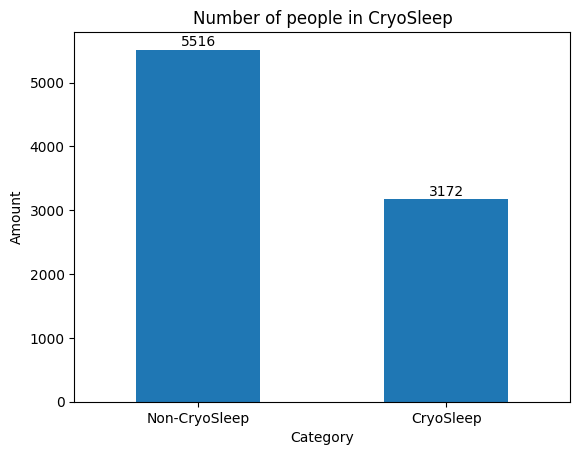

In [16]:
# number of People in Cryosleep

counts=df['CryoSleep'].value_counts()
print(counts[0])
ax=counts.plot(kind='bar')

for i, v in enumerate(counts):
    ax.text(i, v + 60, str(v), ha='center')


plt.xlabel('Category')
plt.ylabel('Amount')
plt.title('Number of people in CryoSleep')
ax.set_xticklabels(['Non-CryoSleep', 'CryoSleep'], rotation=0)  # Define the labels for the positions

plt.show

4378


<function matplotlib.pyplot.show(close=None, block=None)>

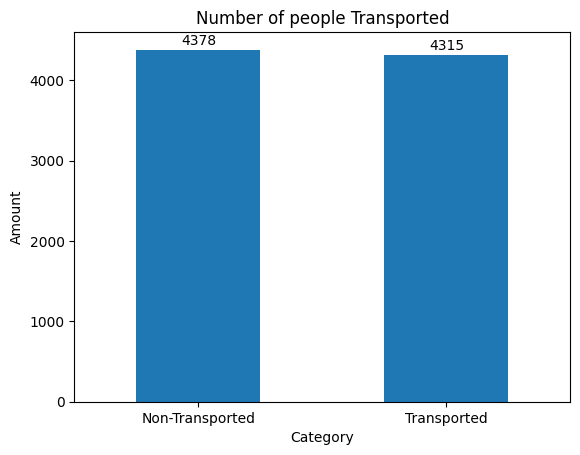

In [17]:
# Transported vs not transported comparison

counts=df['Transported'].value_counts()
print(counts[0])
ax=counts.plot(kind='bar')

for i, v in enumerate(counts):
    ax.text(i, v + 60, str(v), ha='center')


plt.xlabel('Category')
plt.ylabel('Amount')
plt.title('Number of people Transported')
ax.set_xticklabels(['Non-Transported', 'Transported'], rotation=0)  # Define the labels for the positions

plt.show

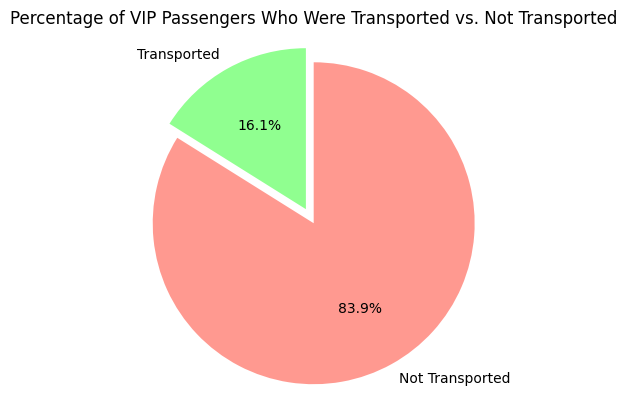

In [86]:
# Filter the data for VIP passengers
vip_data = df[df['VIP']]

# Calculate the number of Transported and not-Transported VIP passengers
Transported_count_vip = vip_data['Transported'].sum()
not_Transported_count_vip = len(vip_data) - Transported_count_vip

# Create data for the pie chart
vip_Transported_data = [Transported_count_vip, not_Transported_count_vip]
labels = ['Transported', 'Not Transported']
colors = ['#90ff90', '#ff9990']
explode = (0.1, 0)

# Plot the pie chart
plt.pie(vip_Transported_data, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
plt.title("Percentage of VIP Passengers Who Were Transported vs. Not Transported")
plt.axis('equal')

# Show the pie chart
plt.show()







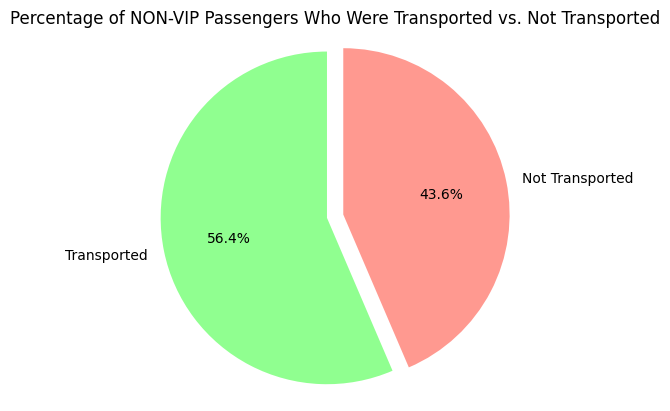

In [85]:
# Filter the data for VIP passengers
non_vip_data = df.query("VIP == False")

# non_vip_data = df[not(df['VIP'])]

# Calculate the number of Transported and not-Transported NON-VIP passengers
Transported_count_nvip = non_vip_data['Transported'].sum()
not_Transported_count_nvip = len(non_vip_data) - Transported_count_nvip

# Create data for the pie chart
nvip_Transported_data = [Transported_count_nvip, not_Transported_count_nvip]
labels = ['Transported', 'Not Transported']
colors = ['#90ff90', '#ff9990']
explode = (0.1, 0)

# Plot the pie chart
plt.pie(nvip_Transported_data, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
plt.title("Percentage of NON-VIP Passengers Who Were Transported vs. Not Transported")
plt.axis('equal')

# Show the pie chart
plt.show()

Passengers in S:  4288
Passengers in P:  4206 

Deck            P     S    n
Transported                 
False        2308  1908   99
True         1898  2380  100 



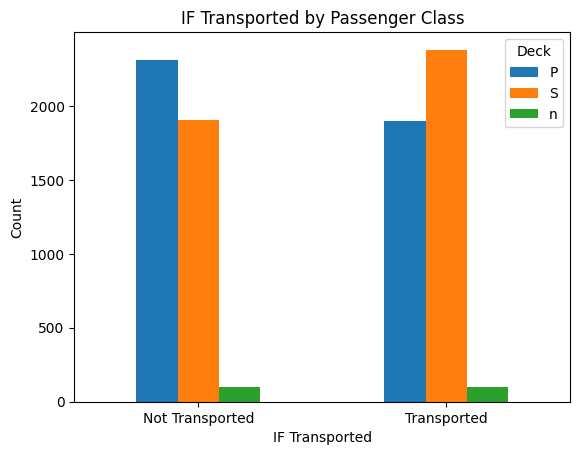

In [56]:
df['Deck'] = df['Cabin'].str[-1]

grouped_data = df.groupby(['Transported', 'Deck']).size().unstack(fill_value=0)

total_S_count = df['Deck'].str.count('S').sum()
total_P_count = df['Deck'].str.count('P').sum()

print('Passengers in S: ', total_S_count)
print('Passengers in P: ', total_P_count, '\n')
print(grouped_data,'\n')

# Create a stacked bar plot
ax = grouped_data.plot(kind='bar', stacked=False)

# Customize the plot
plt.xlabel('IF Transported')
plt.ylabel('Count')
plt.title('IF Transported by Passenger Class')

# Customize the x-axis labels (Survived/Not Survived)
ax.set_xticklabels(['Not Transported', 'Transported'], rotation=0)

# Show the plot
plt.show()